## MODELOS DE PREDICCIÓN

Cargamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

pd.set_option('display.max_columns', None)

Lo siguiente que hacemos es difinir una función para crear las matrices de confusión de manera sencilla

In [2]:
def conf_matrix(Y_test, Y_pred):
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

También definiremos una función para salvar los modelos entrenados gracias a pickle

In [3]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [4]:
X_train = pd.read_csv('../data/X_train.csv', low_memory=False )
X_test = pd.read_csv('../data/X_test.csv', low_memory=False)
Y_train = genfromtxt('../data/Y_train.csv', delimiter=',')
Y_test = genfromtxt('../data/Y_test.csv', delimiter=',')

#### REGRESIÓN LOGÍSTICA

El propósito de un análisis de regresión es investigar la relación estadística entre una variable dependinete (objetivo) con las variables independientes.

In [5]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, Y_train)

LogisticRegression()

In [6]:
Y_pred = logreg.predict(X_test)

In [7]:
print("Regresión logística precision train: ", accuracy_score(Y_train, logreg.predict(X_train)))

Regresión logística precision train:  0.7787971872223821


In [8]:
print("Regresión logística precision test: ", accuracy_score(Y_test, Y_pred))

Regresión logística precision test:  0.7779910662151115


En este modelo de Regresión Logística hemos obtenido un 77.79% de precisión en la muestra test, además no se observa overfitting.

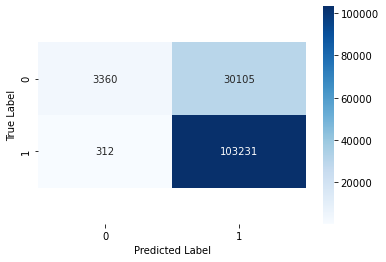

In [9]:
conf_matrix(Y_test, Y_pred)

En la matriz de confusión se muestran los resultados reales y los predichos segun el modelo. Mide la sensibilidad (tasa de verdaderos positivos) y la especifidad (tasa de verdaderos negativos). En la diagonal principal vemos las veces que el modelo ha acertado con su predicción.
De los casos que el modelo predijo que iban a impagar, ha acertado en **3360** y ha fallado en **312** y de los casos en los que el modelo dijo que iban a pagar, ha acertado en **103231** y ha fallado en **30105**.

In [10]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.10      0.18     33465
         1.0       0.77      1.00      0.87    103543

    accuracy                           0.78    137008
   macro avg       0.84      0.55      0.53    137008
weighted avg       0.81      0.78      0.70    137008



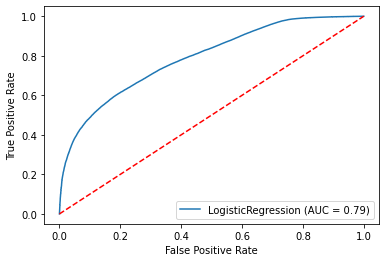

In [11]:
metrics.plot_roc_curve(logreg, X_test, Y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

La curva ROC nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha, proporcionando herramientas para seleccionar modelos posiblemente óptimos. 
En el gráfico visualizamos la tasa de falsos positivos en el eje X y una tasa de verdaderos positivos en el eje Y. El área cubierta por la curva es el área entre la línea azul (ROC) y el eje. Esta área cubierta es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos de aprendizaje automático para distinguir las clases. En este caso vemos que el área no es tan grande (AUC = 0.79) por lo que esperamos obtener un modelo con mejores resultados en el futuro. El valor ideal de AUC sería 1.



#### SUPPORT VECTOR MACHINE

El modelo SVM construye un modelo capaz de predecir si un nuevo punto pertenece a una categoría u otra.

In [12]:
%%time
svclassifier = SVC(kernel='linear', max_iter = 1000)
svclassifier.fit(X_train, Y_train)

Wall time: 17.9 s


C:\Users\Cobaleda\anaconda3\envs\loan\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [13]:
pred_svm1 = svclassifier.predict(X_test)

In [14]:
print("SVM precision train: ", accuracy_score(Y_train, svclassifier.predict(X_train)))

SVM precision train:  0.6844321267251411


In [15]:
print("SVM precision test: ", accuracy_score(Y_test, pred_svm1))

SVM precision test:  0.6815076491883686


Las precisiones del SVM tanto para el test como para el train es del 68.15% en el test por lo tanto, probablemente no elijamos el modelo de predicción SVM como nuestro óptimo.

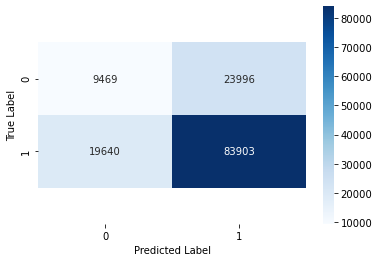

In [16]:
conf_matrix(Y_test,pred_svm1)

En la matriz de confusión se muestran los resultados reales y los predichos segun el modelo. Mide la sensibilidad (tasa de verdaderos positivos) y la especifidad (tasa de verdaderos negativos). En la diagonal principal vemos las veces que el modelo ha acertado con su predicción.
De los casos que el modelo predijo que iban a impagar, ha acertado en **9469** y ha fallado en **19640** y de los casos en los que el modelo dijo que iban a pagar, ha acertado en **83903** y ha fallado en **23996**.

In [17]:
print(classification_report(Y_test,pred_svm1))

              precision    recall  f1-score   support

         0.0       0.33      0.28      0.30     33465
         1.0       0.78      0.81      0.79    103543

    accuracy                           0.68    137008
   macro avg       0.55      0.55      0.55    137008
weighted avg       0.67      0.68      0.67    137008



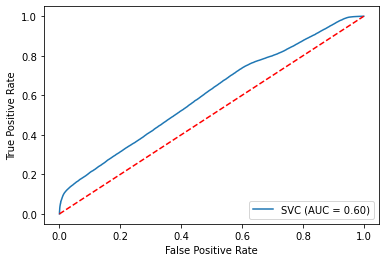

In [18]:
metrics.plot_roc_curve(svclassifier, X_test, Y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

La curva ROC nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha, proporcionando herramientas para seleccionar modelos posiblemente óptimos. 
En el gráfico visualizamos la tasa de falsos positivos en el eje X y una tasa de verdaderos positivos en el eje Y. El área cubierta por la curva es el área entre la línea azul (ROC) y el eje. Esta área cubierta es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos de aprendizaje automático para distinguir las clases. En este caso vemos que el área no es tan grande (AUC = 0.60) por lo que esperamos obtener un modelo con mejores resultados en el futuro. El valor ideal de AUC sería 1.


In [19]:
# %%time
# param_test3 = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
# gsearch_SVM = GridSearchCV(estimator=SVC(max_iter = 1000),
#             param_grid= param_test3 , scoring='roc_auc', n_jobs=-1, iid=False, cv=5)
# gsearch_SVM.fit(X_train, Y_train)

In [20]:
# gsearch_SVM2 = gsearch_SVM.best_estimator_

In [21]:
# save_models('./models/svm_regression', gsearch_SVM2)

In [22]:
gsearch_SVM = pickle.load(open('../models/svm_regression', 'rb'))

C:\Users\Cobaleda\anaconda3\envs\loan\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator SVC from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [23]:
pred_svm = gsearch_SVM.predict(X_test)

In [24]:
print("SVM precision train: ", accuracy_score(Y_train, gsearch_SVM.predict(X_train)))

SVM precision train:  0.5879556061610841


In [25]:
print("SVM precision test: ", accuracy_score(Y_test, pred_svm))

SVM precision test:  0.5870825061310289


Las precisiones del SVM tanto para el test como para el train es del 58.7% por lo tanto, probablemente no elijamos el modelo de predicción SVM como nuestro óptimo.

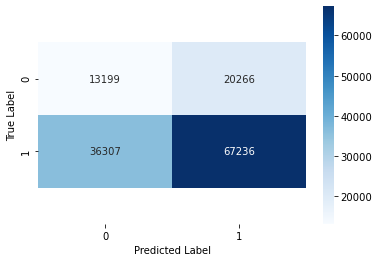

In [26]:
conf_matrix(Y_test,pred_svm)

En la matriz de confusión se muestran los resultados reales y los predichos segun el modelo. Mide la sensibilidad (tasa de verdaderos positivos) y la especifidad (tasa de verdaderos negativos). En la diagonal principal vemos las veces que el modelo ha acertado con su predicción.
De los casos que el modelo predijo que iban a impagar, ha acertado en **13199** y ha fallado en **36307** y de los casos en los que el modelo dijo que iban a pagar, ha acertado en **67236** y ha fallado en **20266**.

In [27]:
print(classification_report(Y_test,pred_svm))

              precision    recall  f1-score   support

         0.0       0.27      0.39      0.32     33465
         1.0       0.77      0.65      0.70    103543

    accuracy                           0.59    137008
   macro avg       0.52      0.52      0.51    137008
weighted avg       0.65      0.59      0.61    137008



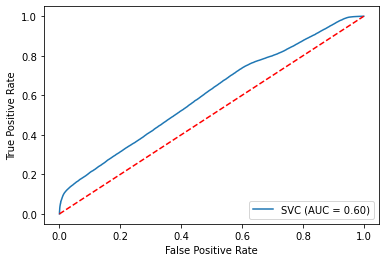

In [28]:
metrics.plot_roc_curve(svclassifier, X_test, Y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()


La curva ROC nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha, proporcionando herramientas para seleccionar modelos posiblemente óptimos. 
En el gráfico visualizamos la tasa de falsos positivos en el eje X y una tasa de verdaderos positivos en el eje Y. El área cubierta por la curva es el área entre la línea azul (ROC) y el eje. Esta área cubierta es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos de aprendizaje automático para distinguir las clases. En este caso vemos que el área no es tan grande (AUC = 0.60) por lo que esperamos obtener un modelo con mejores resultados en el futuro. El valor ideal de AUC sería 1.


#### RANDOM FOREST

El random forest es un método en el cual se utiliza la combinación de arboles predictores de manera que cada árbol depende de los valores de un vector aleatorio.


In [ ]:
 %%time
 random_forest = RandomForestClassifier(n_estimators = 100, n_jobs=6, random_state=0)
 random_forest.fit(X_train, Y_train)

In [ ]:
Y_pred_RF = random_forest.predict(X_test)

In [ ]:
print("Random Forest score train: ", accuracy_score(Y_train, random_forest.predict(X_train)))

In [ ]:
print("Random Forest score test: ", accuracy_score(Y_test, Y_pred_RF))

En este caso obtenemos un 99% de precisión en el Train y un 91% de precisión para el test, por ello no será nuestro mejor modelo. A pesar de que a priori, parece que la precisión del modelo es muy alta, probablemente exista un overfitting, esto quiere decir que existe un efecto con unos ciertos datos para los que se conoce el resultado deseado.

In [ ]:
conf_matrix(Y_test, Y_pred_RF)

En la matriz de confusión se muestran los resultados reales y los predichos segun el modelo. Mide la sensibilidad (tasa de verdaderos positivos) y la especifidad (tasa de verdaderos negativos). En la diagonal principal vemos las veces que el modelo ha acertado con su predicción.
De los casos que el modelo predijo que iban a impagar, ha acertado en **27506** y ha fallado en **6770** y de los casos en los que el modelo dijo que iban a pagar, ha acertado en **96773** y ha fallado en **5959**.

In [ ]:
print(classification_report(Y_test,Y_pred_RF))

In [ ]:
metrics.plot_roc_curve(random_forest, X_test, Y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

La curva ROC nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha, proporcionando herramientas para seleccionar modelos posiblemente óptimos. 
En el gráfico visualizamos la tasa de falsos positivos en el eje X y una tasa de verdaderos positivos en el eje Y. El área cubierta por la curva es el área entre la línea azul (ROC) y el eje. Esta área cubierta es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos de aprendizaje automático para distinguir las clases. En este caso vemos que el área es (AUC = 0.95) por lo que esperamos obtener un modelo con mejores resultados en el futuro. El valor ideal de AUC sería 1.

#### RANDOM FOREST CON RANDOM SEARCHS

In [ ]:
# %%time
# param_test1 = {
#     'bootstrap': [True, False],
#    'max_depth': [6, 8, 10, 12],
#     'max_features': ['auto', 'sqrt'],
#     'n_estimators': [100,200,300,400]
# }
# Forest_RS = RandomizedSearchCV(estimator = RandomForestClassifier(),
#                         param_distributions  = param_test1, scoring='roc_auc',n_jobs=5,iid=False, cv=3)
# Forest_RS.fit(X_train, Y_train)

In [ ]:
# Forest_RS2 = Forest_RS.best_estimator_

In [ ]:
# save_models('./models/random_forest_regression', Forest_RS2)

In [ ]:
Forest_RS = pickle.load(open('../models/random_forest_regression', 'rb'))

In [ ]:
Y_pred_RF_SG = Forest_RS.predict(X_test)

In [ ]:
# print("Random Forest score train: ", accuracy_score(Y_train, Forest_RS.predict(X_train)))

In [ ]:
print("Random Forest score test: ", accuracy_score(Y_test, Y_pred_RF_SG))

En este caso la precisión sigue siendo alta, entorno al 91%, en cambio hemos disminuido el sobreajuste que existía previamente por lo que podría ser un buen modelo.

In [ ]:
conf_matrix(Y_test, Y_pred_RF_SG)

En la matriz de confusión se muestran los resultados reales y los predichos segun el modelo. Mide la sensibilidad (tasa de verdaderos positivos) y la especifidad (tasa de verdaderos negativos). En la diagonal principal vemos las veces que el modelo ha acertado con su predicción.
De los casos que el modelo predijo que iban a impagar, ha acertado en **27654** y ha fallado en **6782** y de los casos en los que el modelo dijo que iban a pagar, ha acertado en **96761** y ha fallado en **5811**.

In [ ]:
print(classification_report(Y_test,Y_pred_RF_SG))

In [ ]:
metrics.plot_roc_curve(Forest_RS, X_test, Y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

La curva ROC nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha, proporcionando herramientas para seleccionar modelos posiblemente óptimos. 
En el gráfico visualizamos la tasa de falsos positivos en el eje X y una tasa de verdaderos positivos en el eje Y. El área cubierta por la curva es el área entre la línea azul (ROC) y el eje. Esta área cubierta es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos de aprendizaje automático para distinguir las clases. En este caso vemos que el área es (AUC = 0.95) por lo que esperamos obtener un modelo con mejores resultados en el futuro. El valor ideal de AUC sería 1.


#### XG BOOST

XGBoost es una implementación de árboles de decisión con Gradient boosting diseñada para minimizar la velocidad de ejecución y maximizar el rendimiento. Utiliza de forma eficaz gran cantidad de hiperparámetros y se pueden modificar y ajustar para asi mejorar la configuración.

In [ ]:
# %%time
# param_test2 = {
# 'learning_rate':np.arange(0.1,1.0,0.2),
# 'gamma': [0.5, 1, 1.5]
# }
# XGBoost = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=500, subsample=0.8,
#                                                             colsample_bytree=0.8,objective= 'binary:logistic',
#                                                             scale_pos_weight=1, seed=40, nthread = 6), 
#                               param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=3)
# XGBoost.fit(X_train, Y_train)

In [ ]:
# XGBoost2 = XGBoost.best_estimator_

In [ ]:
# save_models('./models/xgboost_regression', XGBoost2)

In [ ]:
XGBoost = pickle.load(open('../models/xgboost_regression', 'rb'))

In [ ]:
Y_pred_XG = XGBoost.predict(X_test)

In [ ]:
print("XGBoost score train: ", accuracy_score(Y_train, XGBoost.predict(X_train)))

In [ ]:
print("XGBoost score test: ", accuracy_score(Y_test, Y_pred_XG))

En este modelo tenemos una precisión de casi el 91% y con apenas overfitting.

In [ ]:
conf_matrix(Y_test, Y_pred_XG)

En la matriz de confusión se muestran los resultados reales y los predichos segun el modelo. Mide la sensibilidad (tasa de verdaderos positivos) y la especifidad (tasa de verdaderos negativos). En la diagonal principal vemos las veces que el modelo ha acertado con su predicción.
De los casos que el modelo predijo que iban a impagar, ha acertado en **27449** y ha fallado en **6628** y de los casos en los que el modelo dijo que iban a pagar, ha acertado en **96915** y ha fallado en **6016**.

In [ ]:
print(classification_report(Y_test,Y_pred_XG))

In [ ]:
metrics.plot_roc_curve(XGBoost, X_test, Y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

La curva ROC nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha, proporcionando herramientas para seleccionar modelos posiblemente óptimos. 
En el gráfico visualizamos la tasa de falsos positivos en el eje X y una tasa de verdaderos positivos en el eje Y. El área cubierta por la curva es el área entre la línea azul (ROC) y el eje. Esta área cubierta es AUC. Cuanto mayor sea el área cubierta, mejores serán los modelos de aprendizaje automático para distinguir las clases. 
Este ROC nos dice que el modelo calculado a través de XGBoost es muy bueno, ya que contiene practicamente todo el área por debajo de la curva, siendo practicamente 1.

## CONCLUSIONES

Después de obtener los resultados de la regresión logistica, SVM, random forest y xgboost; nos encontramos en la circunstancia de elegir entre el modelo random forest y xgboost como el modelo que mejor predice. 
Analizando el accuracy de cada modelo, observamos que el random forest pose un **90,8%** de precisión y el xgboost un **90,77%**, los dos tienen una curva ROC igual y prácticamente no se observa overfitting en ninguno de ellos. Por lo tanto el modelo final elegido será el **random forest**.

#### REFERENCIAS

    
    - https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction
    
    - https://www.kaggle.com/gcdatkin/lendingclub-loan-grade-classification
    
    - https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
    
    - https://www.kaggle.com/pavlofesenko/minimizing-risks-for-loan-investments
    
    - https://www.kaggle.com/mrdweebtastic/eda-with-python
    
    - https://medium.com/@sametgirgin/random-forest-regression-in-5-steps-with-python-ee4259eca0de
    
    - https://empresas.blogthinkbig.com/como-interpretar-la-matriz-de-confusion-ejemplo-practico/
    
    - https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
    